In [247]:
class MyLinearRegression:
    def __init__(self, weight=325472385,bias=2732586,learning_rate=0.01,
                 iterations=100):
        self.weight = weight
        self.bias = bias
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.cost_trend = []
        self.cost = 0

    def predict(self, x):
        predicted_set = []
        for i in range(len(x)):
            predicted_value = self.weight * x[i] + self.bias
            predicted_set.append(predicted_value)
        return predicted_set

    def cost_function(self, x, y):
        count = len(x)
        total_error = 0.0
        for i in range(count):
            total_error += (y[i] - (self.weight * x[i] +
                            self.bias)) ** 2
        return float(total_error) / (2 * count)

    def update_weights(self, x, y):
        weight_deriv = 0
        bias_deriv = 0
        count = len(x)

        for i in range(count):
            # Calculate partial derivatives
            # -2x(y - (mx + b))
            weight_deriv += -2 * x[i] * (y[i] -(self.weight * x[i] + self.bias))

            # -2(y - (mx + b))
            bias_deriv += -2 * (y[i] - (self.weight * x[i] +
                                self.bias))

        # We subtract because the derivatives point in direction of steepest
        # ascent
        self.weight -= (weight_deriv / count) * self.learning_rate
        self.bias -= (bias_deriv / count) * self.learning_rate

    def train(self, x, y):
        for i in range(self.iterations):
            self.update_weights(x, y)
            # Calculating cost
            self.cost = self.cost_function(x, y)
            self.cost_trend.append(self.cost)
           # if i % 10000 == 0:
            print("Iteration: {}\t Weight: {}\t Bias: {}\t Cost: {}".format(i, self.weight, self.bias, self.cost))

In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# intialise data of lists. 
data = {'Values':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 
        'Multiples':[2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40]} 
  
# Create DataFrame 
studentscores = pd.DataFrame(data) 
  
# Print the output. 
studentscores 

,Values,Multiples
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10
5,6,12
6,7,14
7,8,16
8,9,18
9,10,20


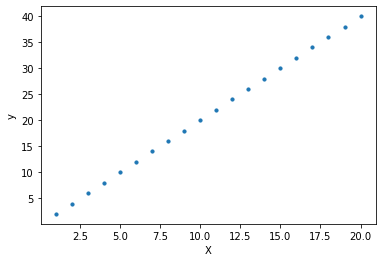

In [249]:
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20] 
y=[2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40]
plt.scatter(x,y,s=10)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [250]:
#from my_linear_regression import MyLinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Importing the dataset

X = studentscores.iloc[:, : -1].values
y = studentscores.iloc[:, -1].values
X,y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16],
        [17],
        [18],
        [19],
        [20]]),
 array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
        36, 38, 40]))

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/10, random_state=0)

# Fitting Simple Linear Regression to the Training set
regressor = MyLinearRegression()
regressor.train(X_train, y_train)
print('Weight: ' + str(regressor.weight) + ' Bias: ' + str(regressor.bias))

# Predicting the Test set results
y_pred = regressor.predict(X_test)


Iteration: 0	 Weight: [-5.80999591e+08]	 Bias: [-65671266.15000001]	 Cost: 2.3891370290191516e+19
Iteration: 1	 Weight: [1.04990691e+09]	 Bias: [57652073.64909998]	 Cost: 7.733924192255545e+19
Iteration: 2	 Weight: [-1.88444092e+09]	 Bias: [-1.63981418e+08]	 Cost: 2.503566824487551e+20
Iteration: 3	 Weight: [3.3950224e+09]	 Bias: [2.35030803e+08]	 Cost: 8.104357595718677e+20
Iteration: 4	 Weight: [-6.10381308e+09]	 Bias: [-4.82624517e+08]	 Cost: 2.6234817237805863e+21
Iteration: 5	 Weight: [1.09864845e+10]	 Bias: [8.08828721e+08]	 Cost: 8.492538079363545e+21
Iteration: 6	 Weight: [-1.9762418e+10]	 Bias: [-1.5145096e+09]	 Cost: 2.749140693399973e+22
Iteration: 7	 Weight: [3.55610258e+10]	 Bias: [2.66588838e+09]	 Cost: 8.899311962428775e+22
Iteration: 8	 Weight: [-6.39769993e+10]	 Bias: [-4.85524481e+09]	 Cost: 2.8808184920825067e+23
Iteration: 9	 Weight: [1.15111917e+11]	 Bias: [8.67702994e+09]	 Cost: 9.325569461350546e+23
Iteration: 10	 Weight: [-2.07105095e+11]	 Bias: [-1.56700132e+10

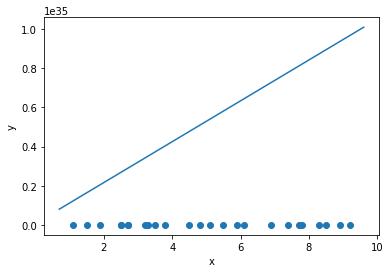

In [252]:
w = regressor.weight
b = regressor.bias
x=[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8] 
y=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]
plt.scatter(x,y)
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = b + w * x_vals
plt.plot(x_vals, y_vals)
plt.xlabel('x')
plt.ylabel('y')
plt.show()